<a href="https://colab.research.google.com/github/sshar180/Machine-Learning-/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 
In this assignment, We will implement PCA, apply it to the [**MNIST**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset, and observe how the reconstruction changes as we change the number of principal components used.

For this assignment we will use the functionality of [Numpy](http://www.numpy.org/), and [Matplotlib](https://matplotlib.org/).

*   Before you start, make sure you have installed all those packages in your local Jupyter instance.
*   If you are asked to implement a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, **please just ASK**.
*   It's okay to use functions in `numpy.linalg` to calculate matrix decomposition (e.g., `la.eig()`, `la.svd()`), but using built-in functions like `sklearn.decomposition.PCA()` will **not** get you any points.


Please read **all** cells carefully and answer **all** parts (both text and missing code). You will need to complete all the code marked `TODO` and answer descriptive/derivation questions.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# DO NOT REMOVE THE CODE ABOVE

## Question 1 [10 points]

**Preliminaries**

The [**MNIST**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

First, Let's import the images and vectorize each image in the dataset.

In [2]:
mnist = load_digits()
imgs = mnist.data

Compute the mean of the images and subtract out the mean.

In [3]:
mean = np.mean(imgs, axis=0)
imgs -= mean

Let us call each zero mean vectorized image to be $X$. For $N$ images, you have $X_1,X_2,\dots,X_N$. Compute $[X^\top X]= R$.

**(a) [2 points]** Perform a principal components analysis of $R = V\Lambda V^\top$.

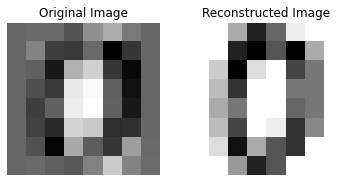

In [4]:
#TODO
# Computing the covariance matrix
covariance_val = np.cov(imgs, rowvar=False)

# Compute the eigenvalues and eigenvectors from the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_val)

# Sort the eigenvalues and eigenvectors in decreasing order
idx = eigenvalues.argsort()[::-1]

eigenvalues = eigenvalues[idx]

eigenvectors = eigenvectors[:, idx]

# Projecting the data onto the eigenvectors
PC = imgs @ eigenvectors

# Reconstructing the imagees from all eigencomponents (R=VΛV⊤)
reconstructed_image = mean + np.dot(PC, eigenvectors.T)

# Plot the original image and the reconstructed image
plt.subplot(1, 2, 1)
plt.imshow(imgs[0].reshape(8, 8), cmap='gray_r', interpolation='nearest')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image[0].reshape(8, 8), cmap='gray_r', interpolation='nearest')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

**(b) [2 points]** Analyze the eigenvalues in $\Lambda$ and decide which eigenvalues to retain and which can be set to zero. 

* You may want to plot the eigenvalues, the fraction of variance explained, AIC, or BIC, and set a threshold.

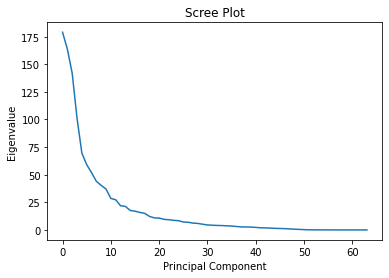

In [5]:
# TODO
plt.plot(eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

29


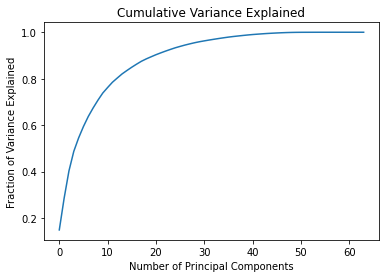

In [6]:
variance_frac = eigenvalues / np.sum(eigenvalues)

no_components = np.where(np.cumsum(variance_frac) > .95) [0][0] + 1
print(no_components)
cumulative_variance = np.cumsum(variance_frac)
plt.plot(cumulative_variance)
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Fraction of Variance Explained')
plt.show()

**(c) [2 points]**  Reconstruct an approximation of each X after removing some of the small eigenvalues. (Display only a couple of the reconstructed **images**, and you will need to add the mean back.)

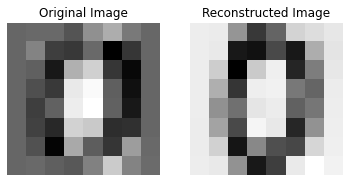

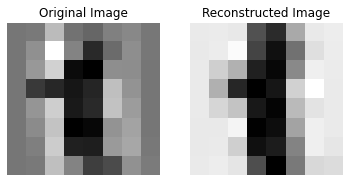

In [7]:
# TODO

# Calculating the proportion of variance explained by each eigenvalue
explained_variance = eigenvalues / np.sum(eigenvalues)

# Deciding which eigenvalues to keep based on the output proportion of variance explained
number_comp = np.where(np.cumsum(explained_variance) > 0.95)[0][0] + 1

# Projecting the image data onto the  number_comp eigenvectors
PC = imgs @ eigenvectors[:, :number_comp]

# Reconstruct the image using the first number_comp eigencomponents
recon_image = mean + np.dot(PC, eigenvectors[:, :number_comp].T)

# Plot the original image and the re-constructed image
plt.subplot(1, 2, 1)
plt.imshow(imgs[0].reshape(8, 8), cmap='gray_r', interpolation='nearest')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(recon_image[0].reshape(8, 8), cmap='gray_r', interpolation='nearest')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

# Plot the original image and the re-constructed image
plt.subplot(1, 2, 1)
plt.imshow(imgs[1].reshape(8, 8), cmap='gray_r', interpolation='nearest')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(recon_image[1].reshape(8, 8), cmap='gray_r', interpolation='nearest')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

**(d) [2 points]**  Compute the error between the reconstructed X and original image. (The mean of the original data should **not** be included in the error.)

In [8]:
# TODO
# Compute the mean squared error between the reconstructed image and the original image
mse = np.mean((recon_image - imgs) ** 2)
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(recon_image, imgs)

print("Mean Squared Error:", mse, "Mean Squared Error using Sklearn is",mse2)

Mean Squared Error: 42.13230038064608 Mean Squared Error using Sklearn is 42.13230038064608


**(e) [2 points]**  Analyze by choosing different numbers of eigenvalues to be zeroed out. Provide a short summary of your conclusions based on this analysis.

In [9]:
# TODO
# Loop over different numbers of eigenvalues to be zeroed out
num_eigenvalues_to_zero = [2,7,14,20,24,50]
for num_zero in num_eigenvalues_to_zero:
    # Zero out the lowest num_zero eigenvalues and corresponding eigenvectors
    eigenvalues[num_zero:] = 0
    eigenvectors[:, num_zero:] = 0

    # Project the data onto the first number_comp eigenvectors
    number_comp = len(eigenvalues)
    PC = imgs @ eigenvectors[:, :number_comp]

    # Reconstruct the image using the first number_comp eigencomponents
    recon_image = mean + np.dot(PC, eigenvectors[:, :number_comp].T)

    # Compute the mean squared error between the reconstructed image and the original image
    mse = np.mean((recon_image - imgs) ** 2)

    print("Number of Eigenvalues Zeroed Out:", num_zero)
    print("Mean Squared Error:", mse)
    print("")

Number of Eigenvalues Zeroed Out: 2
Mean Squared Error: 54.70470297844108

Number of Eigenvalues Zeroed Out: 7
Mean Squared Error: 54.70470297844108

Number of Eigenvalues Zeroed Out: 14
Mean Squared Error: 54.70470297844108

Number of Eigenvalues Zeroed Out: 20
Mean Squared Error: 54.70470297844108

Number of Eigenvalues Zeroed Out: 24
Mean Squared Error: 54.70470297844108

Number of Eigenvalues Zeroed Out: 50
Mean Squared Error: 54.70470297844108



In [10]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,017 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,54

In [11]:
!jupyter nbconvert --log-level CRITICAL --to pdf hw1_PCA.ipynb # make sure the ipynb name is correct

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 5, in <module>
    from nbconvert.nbconvertapp import main
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 194, in <module>
    class NbConvertApp(JupyterApp):
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/nbconvertapp.py", line 346, in NbConvertApp
    formats=get_export_names()
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/exporters/base.py", line 149, in get_export_names
    e = get_exporter(exporter_name)(config=config)
  File "/usr/local/lib/python3.9/dist-packages/nbconvert/exporters/base.py", line 100, in get_exporter
    exporter = entrypoints.get_single("nbconvert.exporters", name).load()
  File "/usr/local/lib/python3.9/dist-packages/entrypoints.py", line 212, in get_single
    for config, distro in iter_files_distros(path=path):
  File "/usr/local/lib/python3.9/dist-packages/entrypoints.py", line 203, in iter_files_distros
    cp.read([path